In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive

In [5]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Data preprocess

In [0]:
train = pd.read_csv("/content/gdrive/My Drive/cnn with keras/train.csv")
test = pd.read_csv("/content/gdrive/My Drive/cnn with keras/test.csv")

In [7]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [8]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
X_train = train.drop(labels = ["label"], axis = 1)
Y_train = train['label']
print(X_train.shape)
print(Y_train.shape)

(42000, 784)
(42000,)


In [11]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

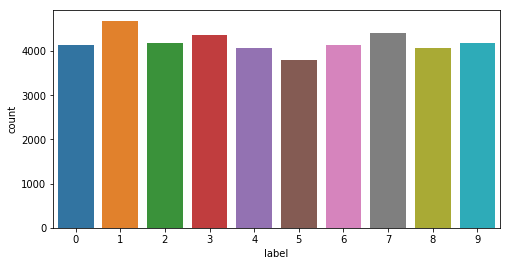

In [12]:
import seaborn as sns
plt.figure(figsize = (8, 4))
sns.countplot(x = 'label', data = train);

## Data normalizing 데이터 정규화

In [0]:
X_train = X_train.astype('float32')/255
test = test.astype('float32')/255

## Reshape
* 3D matrix로

In [0]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [15]:
X_train.shape

(42000, 28, 28, 1)

In [16]:
test.shape

(28000, 28, 28, 1)

## Lable Encoding

In [17]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

Using TensorFlow backend.


In [18]:
Y_train.shape

(42000, 10)

In [19]:
print(Y_train[:5])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## 데이터 분할
* training data를 training data와 validation data (검증 데이터) 로 분할

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 42)

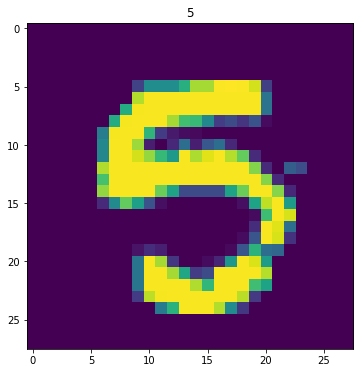

In [28]:
plt.figure(figsize = (6, 6))
plt.imshow(X_train[1][:,:,0])
plt.title(Y_train[1].argmax());

## Building CNN architecture using Keras

* cnn model 정의

In [0]:
from keras.layers import Input, InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

In [34]:
inputShape = (28, 28, 1)
input = Input(inputShape)

x = Conv2D(64, (3, 3), strides = (1, 1), name = 'layer_conv1', padding = 'same')(input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), name = 'maxPool1')(x)

x = Conv2D(64, (3, 3), strides = (1, 1), name = 'layer_conv2', padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), name = 'maxPool2')(x)

x = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv3', padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), name = 'maxPool3')(x)

x = Flatten()(x)
x = Dense(64, activation = 'relu', name = 'fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32, activation = 'relu', name = 'fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10, activation = 'softmax', name = 'fc2')(x)

model = Model(inputs = input, outputs = x, name = 'Predict')

W0813 03:06:28.011373 140033772607360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0813 03:06:28.245441 140033772607360 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
maxPool1 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 64)        256       
__________

## Data Augmentation
* 데이터 확대

In [0]:
datagen_train = ImageDataGenerator(
  width_shift_range = 0.2, #랜덤하게 수평적으로 이미지 시프트
  height_shift_range = 0.2, #랜덤하게 수직적으로 이미지 시프트
  horizontal_flip = True)

datagen_train.fit(X_train) #데이터에 증강 이미지 제너레이터 맞춤

## Optimizer

In [40]:
momentum = 0.5
sgd = SGD(lr = 0.01, momentum = momentum, decay = 0.0, nesterov = False)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

W0813 03:46:44.144052 140033772607360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
import math
def step_decay(epoch):
  initial_lrate = 0.1
  drop = 0.6
  epochs_drop = 3.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch) / epochs_drop))
  return lrate

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

In [44]:
history = model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid),
                    epochs = 35, callbacks = callbacks_list, verbose = 1)

W0813 03:57:02.318434 140033772607360 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 37800 samples, validate on 4200 samples
Epoch 1/35
37800/37800 [==============================] - 154s 4ms/step - loss: 0.4426 - acc: 0.8586 - val_loss: 0.0900 - val_acc: 0.9752
Epoch 2/35
37800/37800 [==============================] - 153s 4ms/step - loss: 0.1318 - acc: 0.9643 - val_loss: 0.0939 - val_acc: 0.9738
Epoch 3/35
37800/37800 [==============================] - 154s 4ms/step - loss: 0.0787 - acc: 0.9796 - val_loss: 0.0596 - val_acc: 0.9855
Epoch 4/35
37800/37800 [==============================] - 156s 4ms/step - loss: 0.0676 - acc: 0.9825 - val_loss: 0.0445 - val_acc: 0.9876
Epoch 5/35
37800/37800 [==============================] - 155s 4ms/step - loss: 0.0593 - acc: 0.9847 - val_loss: 0.0445 - val_acc: 0.9895
Epoch 6/35
37800/37800 [==============================] - 156s 4ms/step - loss: 0.0457 - acc: 0.9878 - val_loss: 0.0406 - val_acc: 0.9907
Epoch 7/35
37800/37800 [==============================] - 153s 4ms/step - loss: 0.0417 - acc: 0.9882 - val_loss: 0.0468 - v

## Plotting training and validation loss

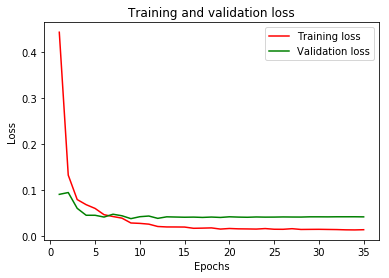

In [46]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color = 'red', label = 'Training loss')
plt.plot(epochs, val_loss, color = 'green', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

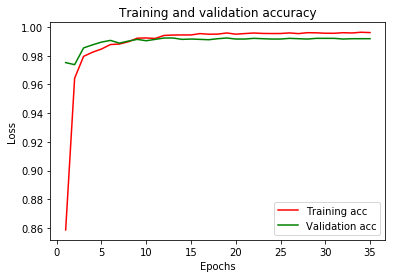

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color = 'red', label = 'Training acc')
plt.plot(epochs, val_acc, color = 'green', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
print("on valid data")
pred1 = model.evaluate(X_valid, Y_valid)
print("accuracy", str(pred1[1] * 100))
print("Total loss", str(pred1[0] * 100))

on valid data
4200/4200 [==============================] - 5s 1ms/step
accuracy 99.19047619047619
Total loss 4.102617111511921


## Visualize CNN Layers

In [0]:
from keras.models import Model


layer_outputs = [layer.output for layer in model.layers]
layer_outputs = layer_outputs[1:]
activation_model = Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(X_train[10].reshape(1, 28, 28, 1))

def display_activation(activations, col_size, row_size, act_index):
  activation = activations[act_index]
  activation_index = 0
  fig, ax = plt.subplots(row_size, col_size, figsize = (row_size * 2.5, col_size * 1.5))
  for row in range (0, row_size):
    for col in range(0, col_size):
      ax[row][col].imshow(activation[0, :, :, activation_index], cmap = 'gray')
      activation_index += 1

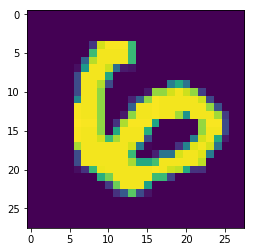

In [57]:
plt.imshow(X_train[10][:, :, 0]);

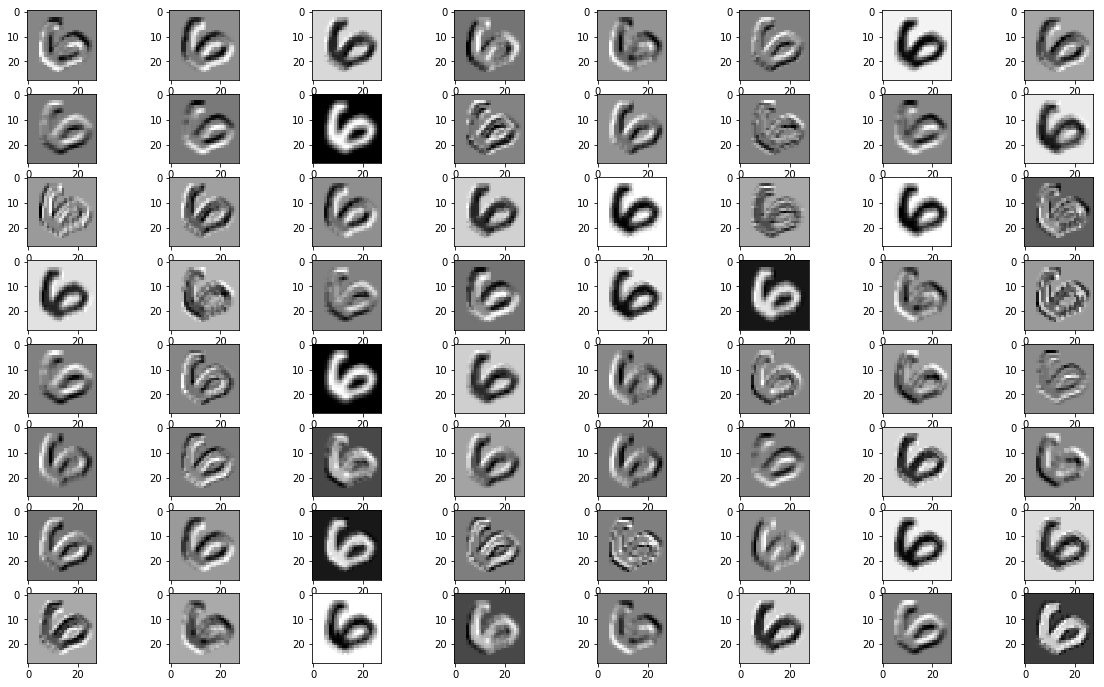

In [58]:
display_activation(activations, 8, 8, 1) #layer 2 display

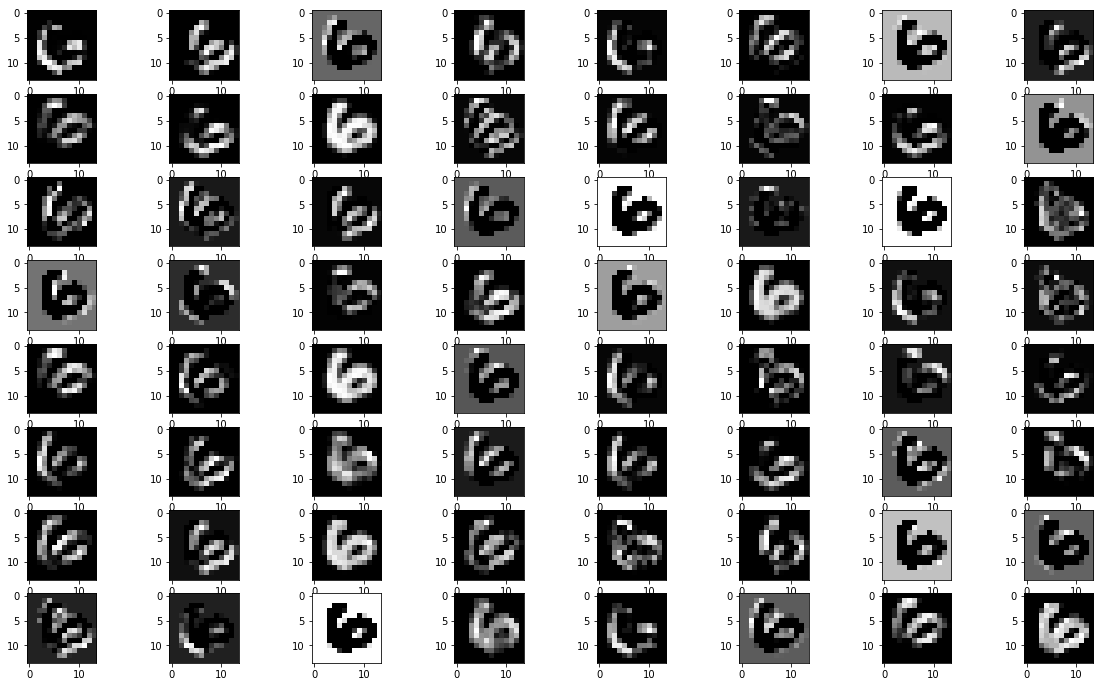

In [59]:
display_activation(activations, 8, 8, 3) #layer 4 display

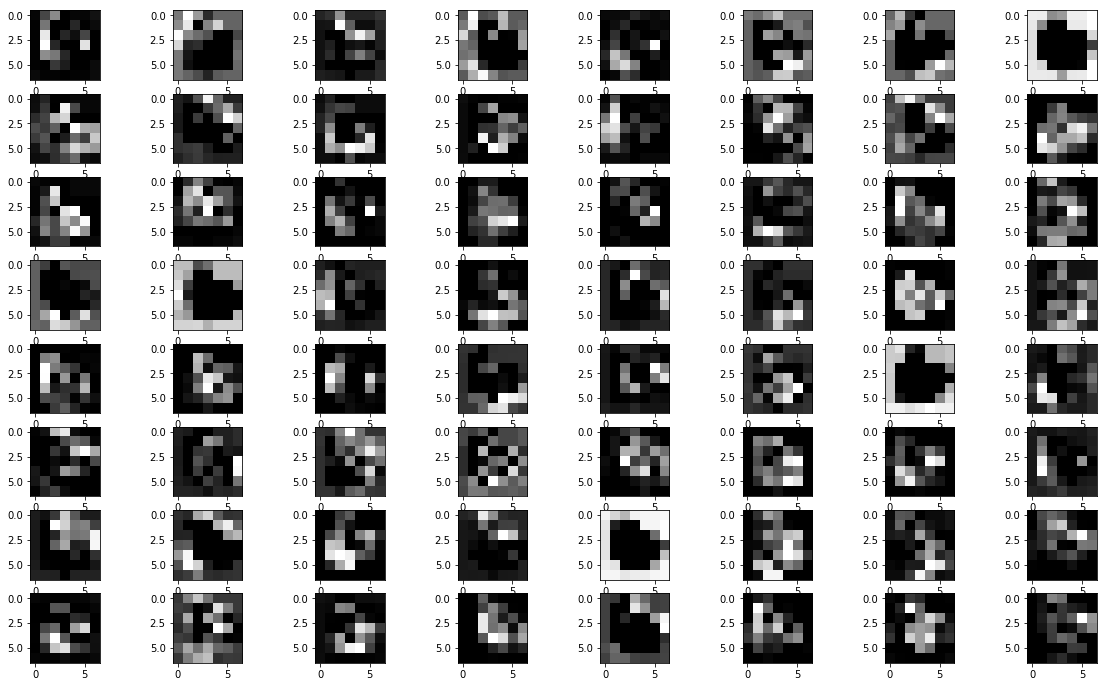

In [60]:
display_activation(activations, 8, 8, 7)

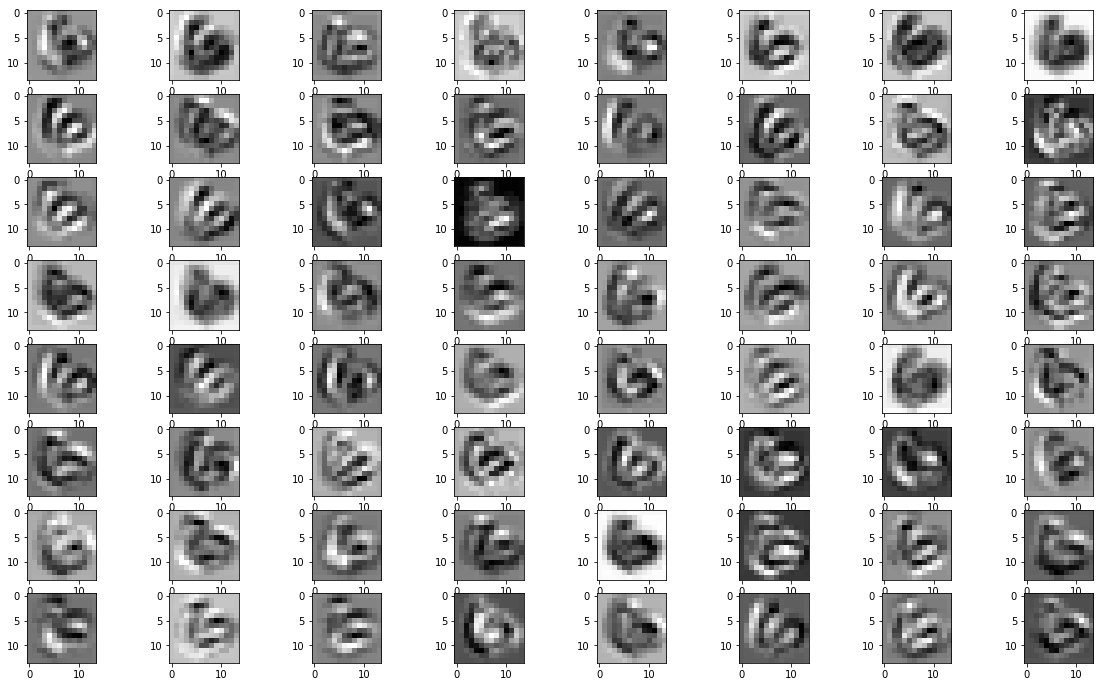

In [61]:
display_activation(activations, 8, 8, 5)

In [0]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict(X_valid)
# 예측 클래스들을 one hot 벡터들로 변환
Y_pred_classes = np.argmax(Y_prediction, axis = 1)
# validation 관측값들을 one hot 벡터들로 변환
Y_true = np.argmax(Y_valid, axis = 1)
# confusion matrix 계산
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

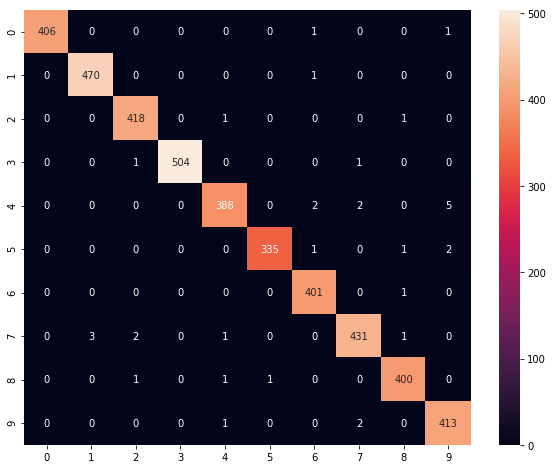

In [65]:
plt.figure(figsize = (10, 8))
sns.heatmap(confusion_mtx, annot = True, fmt = "d")

In [0]:
results = model.predict(test)
results = np.argmax(results, axis = 1)

In [0]:
submissions = pd.DataFrame({"ImageId": list(range(1, len(results) + 1)),
                            "Label" : results})
submissions.to_csv("re2-submission.csv", index = False, header = True)